# Microsoft Movie Studio Data Analysis
---

Authors: Andrew Bernklau, [Kelsey Lane](kelsklane@gmail.com), Lenore Perconti

## Overview
---

This project analyzes various datasets related to movies in order to formulate three relevant reccomendations for the direction of Microsoft's new movie studio. By looking at **columns**, the data show that **basic results**. Microsoft can use these reccomendations to help decide which direction they want to take their new studio in terms of what types of movies to create for **intended direction ie) gross/rating**.

## Business Problem
---
For its future movies, Microsoft should **summarize reccomendations**. By following these reccomendations, Microsoft can **target audience/money/aka how use**. **Summarize implications of project for prob/stakeholder**

## Data
---
[IMDB](https://www.imdb.com) is a public, online database with information about video media content. The datasets provide infomration about directors, writers, ratings, and runtime that can be used to track the success of different films. **edit features** The datasets used in the analysis include ones pretaining to **list used datasets**.
- **Present size of datasets and descriptive stats for features used in analysis**
- **Justify features inclusion based on properties + project relevance**
- **Identify any data limitations that have project implications - nothing earlier than 2018 (?)**

# Initial Exploration

Loads in libraries used throughout the notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read in Files:

In [2]:
imdb = pd.read_csv('Data/imdb.csv')

In [3]:
#Columns: title, studio, domestic_gross, foreign_gross, year
bom_movie_gross = pd.read_csv('Data/bom.movie_gross.csv.gz', compression='gzip')

#Columns: nconst, primary_name, birth_year, death_year, primary_profession, known_for_titles
imdb_name_basics = pd.read_csv('Data/imdb.name.basics.csv.gz', compression='gzip')

#Columns: title_id, ordering, title, region, language, types, attributes, is_original_title
imdb_title_akas = pd.read_csv('Data/imdb.title.akas.csv.gz', compression='gzip')

#Columns: tconst, primary_title, original_title, start_year, runtime_minutes, genres
imdb_title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz', compression='gzip')

#Columns: tconst, directors, writers
imdb_title_crew = pd.read_csv('Data/imdb.title.crew.csv.gz', compression='gzip')

#Columns: tconst, ordering, nconst, category, job, characters
imdb_title_principals = pd.read_csv('Data/imdb.title.principals.csv.gz', compression='gzip')

#Columns: tconst, averagerating, numvotes
imdb_title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz', compression='gzip')

#Columns: id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio
rt_movie_info = pd.read_csv('Data/rt.movie_info.tsv.gz', compression='gzip', sep = '\t')

#Columns: id, review, rating, fresh, critic, top_critic, publisher, date
rt_reviews = pd.read_csv('Data/rt.reviews.tsv.gz', compression='gzip', sep = '\t', encoding = 'latin1')

#Columns: Unnamed:0, genre_ids, original_language, original_title, popularity, release_date, title, vote_average, vote_count
tmdb_movies = pd.read_csv('Data/tmdb.movies.csv.gz', compression='gzip')

#Columns: id, release_date, movie, production_budget, domestic_gross, worldwide_gross
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz', compression='gzip')


In [22]:
#imdb_title_basic
#imdb_title_crew
#imdb_name_basics
#imdb_title_ratings

imdb_title_basics_slim = imdb_title_basics[['tconst', 'primary_title', 'start_year', 'genres', 'runtime_minutes']]
imdb_name_basics_slim = imdb_name_basics[['nconst', 'primary_name', 'death_year']]
imdb_title_ratings_slim = imdb_title_ratings[['tconst', 'averagerating', 'numvotes']]

recent_imdb_title_basics = imdb_title_basics_slim[(imdb_title_basics_slim['start_year'] >= 2014) & (imdb_title_basics_slim['start_year'] <= 2018)]
imdb_title_ratings_half = imdb_title_ratings_slim[imdb_title_ratings_slim['numvotes'] >= imdb_title_ratings_slim['numvotes'].mean()]


one = recent_imdb_title_basics.merge(imdb_title_crew, how = 'inner')
imdb = one.merge(imdb_title_ratings_half, how = 'inner')

#imdb.to_csv('Data/imdb.csv', index = False)
#imdb_name_basics_slim.to_csv('Data/imdb_name_basics_slim', index = False)



# Box Office Mojo Data Rundown

In [4]:
#bom_movie_gross['year'].max()

Foreign_gross needs to be converted to an int from string

Studio has 5 missing values, domestic gross is missing 28 values, foreign gross is missing 1350

Two movies named Bluebeard (same or different movies?)

Could look into domestic vs foreign markets, most profitable studios + trends they follow?

# IMDb Data Rundown

In [105]:
#imdb_name_basics.head()
#imdb_title_akas.head()
#imdb_title_basics.head()
#imdb_title_crew['writers'].value_counts()
#imdb_title_principals['characters'].value_counts()
#imdb_title_ratings.info()

nm0000636                        80
nm2682776                        48
nm3266654                        46
nm3583561                        40
nm0772905                        34
                                 ..
nm5722711                         1
nm1420267,nm1421040               1
nm6285356                         1
nm6250407,nm6250400,nm5793432     1
nm9905261                         1
Name: writers, Length: 91920, dtype: int64

**Probably need to match movie titles/names instead of tt and nm tags**

**name_basics**: List of people and their primary profession as well as titles they're known for
- many birth yers and death years missing - can drop these columns? dont seem to provide useful info
- 51,340 rows missing profession
- 30,204 rows missing known for titles
- many names are repeated multiple times - would have to consolodate this info
- could be useful to get list of current trending directors/actors etc to reccomend for a film?
- would need to clean up primary_profession column so seperate based on , then add proffesions to a list so easier to access data

**title_akas**: international info? titles, regions, language, and lists if original or not
- may have issues with this one due to foreign text, ditch it?
- region is missing info and language missing a lot of info, types and attributes also missing info
- lists US info, types marks if in festivale/dvd/etc, attributes has info on if new/alt spelling/complete title
- could be used to clarify info in other tables perhaps?

**title_basics**: List of titles (original and marketed) plus the runtime, start_year, and genres
- original title is missing 21 entries, runtime missing 31,739 entries, genre missing 5,408
- primary and original title has many repeats of names
- one of the films starts in 2115? Error or start_year is like, in film universe start
- would need to split genre on commas and makes list for easier readability of data
- would be good to groupby year and look and runtime/genre trends?

**title_crew**: List of titles and their directors and writers (references name_basic)
- Directors missing 5727 entries and writers missing 35,883 entries
- basically useful if we want to recommend a list of directors/writers of top movies
- could also look at high # of director/writer and see what projects they worked on ie do it backwards

**title_principals**: List of movies and people, for actors lists the role, ordering = importance?
- job and character predictably have null values
- Useful to see what actor played what character ie) wanna only nab main cast + not supporting

**title_ratings**: Has average movie rating and number of votes
- Basically where to grab rating info - merge w/ title_basics?
- no null values! But doesn't contain same number of films as original list
    - probably because there are duplicate movies in original list potentially?
    - only look at movies with ratings??

# Rotten Tomatoes Rundown

In [58]:
#rt_movie_info['genre'].value_counts()
#rt_reviews.info()

**movie_info**: general info on films as well as theater release/dvd_date/box office/studio
- missing info in every column but id, mostly in currency/box office and studio
- could use for rating info - seperate into children/adult movies?
    - mostly R/NR movies, around 1/6 or so are PG and even less are G

**reviews**: contains fresh/rotten review, top critic + publisher as well as date of review
- rating, review, publisher, and critic all missing info
- rating would need to get converted to int
- who to reach out for to review film? or which publisher?

# TheMovieDatabase Rundown

In [69]:
#tmdb_movies['vote_average'].sort_values(ascending = False)

- no missing values! data actually seems pretty clean/well formated
- There are duplicate movie entries though
- popularity ranking, vote avg and vote count could be useful popularity metrics?

# The Numbers Rundown

In [68]:
#tn_movie_budgets['movie'].value_counts()

- also no missing data!
- need to convert budget and gross columns into ints though
- some movies also in here multiple times
- budgets alongside domestic and worldwide gross
    - does worldwide include domestic?

# Possible reccomendations to work towards

1. Good genre/genre combos
    - also consider quantity per year grouped by studio
    - maybe look into both domestic + international market
    - so one rec if want corner domestic market and one rec for international?
2. Based on top ratings OR top grossing films - what cast/director/writer to angle for? Studio to work with?
3. Recommendation for top grossing + different for top rated?
    - that way could cater to if just want money or interested in like, artistic value
4. Could also seperate out recommendations based on audience ie) PG vs R

# Cast and Crew Analysis
--- 
Focus on domestic market as international would require probably working with a foreign director etc.

In [118]:
#bom_movie_gross['year'].value_counts()
#imdb_title_basics.head()
#imdb_name_basics.head()
#imdb_title_crew.head()
#imdb_title_principals.head()

In [50]:
#Creates a dataframe of top x most grossing films in the last three years of the dataframe
recent_bom_movie_gross = bom_movie_gross[bom_movie_gross['year'] >= 2016]
top_recent_gross = recent_bom_movie_gross['domestic_gross'].sort_values(ascending = False)
top_recent_gross_title = [bom_movie_gross['title'].iloc[film] for film in top_recent_gross.index]
#bom_movie_gross_top = bom_movie_gross[bom_movie_gross['title'].isin(top_recent_gross_title)]

In [7]:
#Merges basic cast and titles dataframes together than grabs only the rows with movies that have information on gross income
imdb_title_basic_crew = imdb_title_basics.merge(imdb_title_crew, how = 'inner')

#gross_imdb = imdb_title_basic_crew[imdb_title_basic_crew['primary_title'].isin(top_recent_gross_title)]

#gross_imdb_directors = gross_imdb['directors'].value_counts()[:10]
#bar_height = list(gross_imdb['directors'].value_counts()[:10].values)

#fig, ax = plt.subplots()
#ax.bar(x = gross_imdb_directors.index, height = bar_height)


In [130]:
#best_director = gross_imdb['directors'].value_counts().index[0]
#best_director
#imdb_name_basics[imdb_name_basics['nconst'] == est_director]


# Top Directors and Writers by Genre

In [ ]:
# Make dataset use for analysis

#recent_bom_movie_gross = bom_movie_gross[bom_movie_gross['year'] >= 2014]
#imdb_title_basic_crew = imdb_title_basics.merge(imdb_title_crew, how = 'inner')
#imdb_with_gross = imdb_title_basic_crew.merge(recent_bom_movie_gross, how = 'inner', left_on = 'primary_title', right_on = 'title')
#imdb_with_gross_year = imdb_with_gross[imdb_with_gross['year'] == imdb_with_gross['start_year']]


#

split_directors = top_100_gross_films.assign(directors=top_100_gross_films.directors.str.split(",")).explode('directors')
gross_imdb_directors_100 = split_directors['directors'].value_counts()[:12]

# Top 100 Grossing Movies - Directors

In [15]:
recent_bom_movie_gross = bom_movie_gross[bom_movie_gross['year'] >= 2016]
top_recent_gross_100 = recent_bom_movie_gross['domestic_gross'].sort_values(ascending = False)[:124]
gross_title_100 = [bom_movie_gross['title'].iloc[film] for film in top_recent_gross_100.index]
bom_movie_gross_top = bom_movie_gross[bom_movie_gross['title'].isin(gross_title_100)]

top_100_films = imdb_title_basic_crew.merge(bom_movie_gross_top, how = 'inner', left_on = 'primary_title', right_on = 'title')

top_100_gross_films = top_100_films[top_100_films['year'] == top_100_films['start_year']]

#gross_imdb_directors_100 = gross_imdb_100['directors'].value_counts()[:10]
#bar_height = list(gross_imdb_100['directors'].value_counts()[:10].values)

#fig, ax = plt.subplots()
#ax.bar(x = gross_imdb_directors_100.index, height = bar_height)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,title,studio,domestic_gross,foreign_gross,year
0,tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",nm0420941,"nm0374302,nm0811583,nm0297229,nm0551376,nm4243936",Wonder Woman,WB,412600000.0,409300000,2017
5,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",nm0000142,"nm10095627,nm1010405",The Mule,WB,103800000.0,68700000,2018
6,tt0918940,The Legend of Tarzan,The Legend of Tarzan,2016,110.0,"Action,Adventure,Drama",nm0946734,"nm3092414,nm0108132,nm0123194",The Legend of Tarzan,WB,126600000.0,230100000,2016
7,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",nm0811583,"nm0796950,nm0795975,nm0006516,nm0811583,nm0923...",Justice League,WB,229000000.0,428900000,2017
9,tt2380307,Coco,Coco,2017,105.0,"Adventure,Animation,Comedy","nm0881279,nm2937122","nm0881279,nm0441735,nm0017690,nm2937122",Coco,BV,209700000.0,597400000,2017


In [133]:
#best_director = gross_imdb_100['directors'].value_counts().index[:7]
#best_director_list = list(best_director)
#best_director_list
     
#names = imdb_name_basics[imdb_name_basics['nconst'].isin(best_director_list)]


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
24027,nm0000142,Clint Eastwood,1930.0,NaN,"actor,producer,director","tt0405159,tt0105695,tt1205489,tt0112579"
31594,nm0001741,Bryan Singer,1965.0,NaN,"producer,director,writer","tt0120903,tt0114814,tt1877832,tt0348150"
46677,nm0001226,James Foley,1953.0,NaN,"director,writer,actor","tt0104348,tt0090670,tt4477536,tt1856010"
71846,nm0811583,Zack Snyder,1966.0,NaN,"producer,director,writer","tt0770828,tt0451279,tt0409459,tt0416449"
115868,nm1490123,James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852"
118023,nm0946734,David Yates,1963.0,NaN,"director,producer,writer","tt0918940,tt0373889,tt1201607,tt0926084"


# Top 100 Grossing Movies - Split up directors

<BarContainer object of 12 artists>

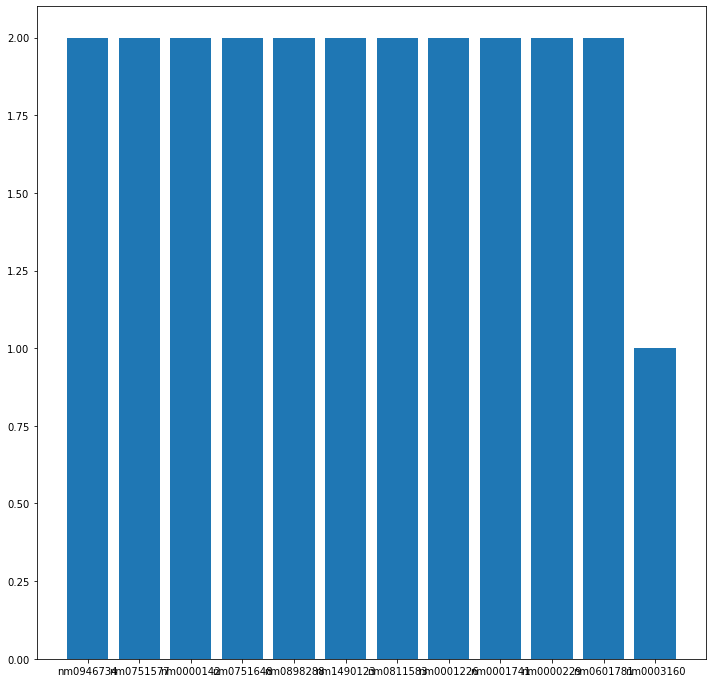

In [18]:
split_directors = top_100_gross_films.assign(directors=top_100_gross_films.directors.str.split(",")).explode('directors')

gross_imdb_directors_100 = split_directors['directors'].value_counts()[:12]
bar_height = list(split_directors['directors'].value_counts()[:12].values)

fig, ax = plt.subplots(figsize = (12, 12))
ax.bar(x = gross_imdb_directors_100.index, height = bar_height)

In [19]:
best_director = split_directors['directors'].value_counts().index[:11]
best_director_list = list(best_director)
best_director_list
     
names = imdb_name_basics[imdb_name_basics['nconst'].isin(best_director_list)]
names

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
2797,nm0751648,Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
24027,nm0000142,Clint Eastwood,1930.0,NaN,"actor,producer,director","tt0405159,tt0105695,tt1205489,tt0112579"
31594,nm0001741,Bryan Singer,1965.0,NaN,"producer,director,writer","tt0120903,tt0114814,tt1877832,tt0348150"
46677,nm0001226,James Foley,1953.0,NaN,"director,writer,actor","tt0104348,tt0090670,tt4477536,tt1856010"
49375,nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"
71846,nm0811583,Zack Snyder,1966.0,NaN,"producer,director,writer","tt0770828,tt0451279,tt0409459,tt0416449"
85758,nm0000229,Steven Spielberg,1946.0,NaN,"producer,writer,director","tt0108052,tt0082971,tt0083866,tt0120815"
98976,nm0898288,Denis Villeneuve,1967.0,NaN,"director,writer,editor","tt1856101,tt2543164,tt3397884,tt1255953"
115868,nm1490123,James Wan,1977.0,NaN,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852"
118023,nm0946734,David Yates,1963.0,NaN,"director,producer,writer","tt0918940,tt0373889,tt1201607,tt0926084"


# Directors With Highest Total Domestic Gross In Last Five Years

<BarContainer object of 10 artists>

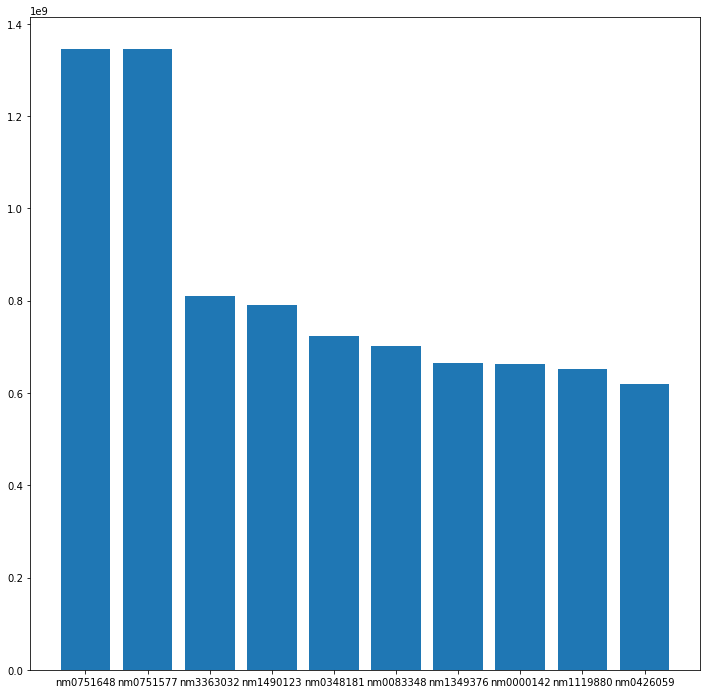

In [91]:
recent_bom_movie_gross = bom_movie_gross[bom_movie_gross['year'] >= 2014]
imdb_title_basic_crew = imdb_title_basics.merge(imdb_title_crew, how = 'inner')
imdb_with_gross = imdb_title_basic_crew.merge(recent_bom_movie_gross, how = 'inner', left_on = 'primary_title', right_on = 'title')
imdb_with_gross_year = imdb_with_gross[imdb_with_gross['year'] == imdb_with_gross['start_year']]

#COME BACK HERE LATER
#26 movies with duplicate titles still
#whoops = imdb_with_gross_year['primary_title'].value_counts()


split_directors = imdb_with_gross_year.assign(directors=imdb_with_gross_year.directors.str.split(",")).explode('directors')
top_grossing_directors = split_directors.groupby('directors')['domestic_gross'].sum().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (12,12))
ax.bar(x = top_grossing_directors.index, height = top_grossing_directors.values)


In [92]:
best_director = top_grossing_directors.index[:2]
best_director_list = list(best_director)
best_director_list
     
names = imdb_name_basics[imdb_name_basics['nconst'].isin(best_director_list)]
names

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
2797,nm0751648,Joe Russo,1971.0,NaN,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820"
49375,nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796"


# Directors With Highest Total Domestic Gross In Last Five Years

In [55]:
recent_bom_movie_gross = bom_movie_gross[bom_movie_gross['year'] >= 2014]
imdb_title_basic_crew = imdb_title_basics.merge(imdb_title_crew, how = 'inner')
imdb_with_gross = imdb_title_basic_crew.merge(recent_bom_movie_gross, how = 'inner', left_on = 'primary_title', right_on = 'title')
imdb_with_gross_year = imdb_with_gross[imdb_with_gross['year'] == imdb_with_gross['start_year']]

#Need to clean foreign gross and combine to get better look at total gross

#imdb_with_gross_year['total_gross'] = imdb_with_gross_year['domestic_gross'] + imdb_with_gross_year['foreign_gross']
#imdb_with_gross_year['foreign_gross'] = imdb_with_gross_year['foreign_gross'].fillna(value = '0')

#imdb_with_gross_year["foreign_gross_clean"] = imdb_with_gross_year['foreign_gross'].str.replace('[^\w\s]','')
#imdb_with_gross_year['foreign_gross'] = imdb_with_gross_year['foreign_gross'].astype(float)



# Directors With Highest Total Domestic Gross In Last Five Years Other Data

In [102]:
#recent_bom_movie_gross = bom_movie_gross[bom_movie_gross['year'] >= 2014]
#imdb_title_basic_crew = imdb_title_basics.merge(imdb_title_crew, how = 'inner')
#imdb_with_gross = imdb_title_basic_crew.merge(recent_bom_movie_gross, how = 'inner', left_on = 'primary_title', right_on = 'title')
#imdb_with_gross_year = imdb_with_gross[imdb_with_gross['year'] == imdb_with_gross['start_year']]

tn_movie_budgets['year_tn'] = tn_movie_budgets['release_date'].str[-4:]
tn_movie_budgets['year_tn'] = tn_movie_budgets['year_tn'].astype(int)
recent_tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['year_tn'] >= 2014]


def remove_punctuations(text):
    punctuation = ['$', ","]
    for punct in punctuation:
        text = text.replace(punct, '')
    return text

recent_tn_movie_budgets['production_budget_clean'] = recent_tn_movie_budgets['production_budget'].apply(remove_punctuations).astype(int)
#recent_tn_movie_budgets['production_budget_clean'] = recent_tn_movie_budgets['production_budget_clean'].astype(int)
recent_tn_movie_budget = recent_tn_movie_budgets[['movie', 'year_tn', 'production_budget_clean']]


<ipython-input-102-eecb17635e40>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_tn_movie_budgets['production_budget_clean'] = recent_tn_movie_budgets['production_budget'].apply(remove_punctuations).astype(int)


In [101]:
imdb_bom_tn = imdb_with_gross_year.merge(recent_tn_movie_budget, how = 'inner', left_on = 'primary_title', right_on = 'movie')
imdb_bom_tn_nodup = imdb_bom_tn[imdb_bom_tn['year_tn'] == imdb_bom_tn['start_year']]

#When add in budgets get back half the data
len(imdb_bom_tn_nodup)

imdb_bom_tn_dirc = imdb_bom_tn_nodup.assign(directors=imdb_bom_tn_nodup.directors.str.split(",")).explode('directors')
top_directors = imdb_bom_tn_dirc.groupby('directors')[['domestic_gross', 'production_budget_clean']].sum().sort_values(ascending = False, by = 'domestic_gross')[:10]

#fig, ax = plt.subplots(figsize = (12,12))
#ax.bar(x = top_grossing_directors.index, height = top_grossing_directors.values)



,domestic_gross,production_budget_clean
directors,,
nm0751648,1.346700e+09,720000000
nm0751577,1.346700e+09,720000000
nm3363032,8.099000e+08,237000000
nm0083348,7.020000e+08,370000000
nm1490123,6.881000e+08,350000000
nm1349376,6.657000e+08,354000000
nm0000142,6.623000e+08,238000000
nm1119880,6.523000e+08,215000000
nm0001741,6.057000e+08,433000000


# Why Not Use The Numbers For Gross?

In [78]:
#The dataset that results after looking at most recent years is smaller

tn_movie_budgets['year'] = tn_movie_budgets['release_date'].str[-4:]
tn_movie_budgets['year'] = tn_movie_budgets['year'].astype(int)
recent_tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['year'] >= 2014]
len(recent_tn_movie_budgets)

1193

# **** Grab Drama and Action Genres

In [20]:
split_genres = imdb.assign(genres=imdb.genres.str.split(",")).explode('genres')

drama_imdb = split_genres[split_genres['genres'] == 'Drama']
action_imdb = split_genres[split_genres['genres'] == 'Action']

# *** For Drama Genre, Recommended Director

In [6]:
imdb_name_basics_slim = imdb_name_basics[['nconst', 'primary_name', 'death_year']]

#Splits up any entry with multiple directors to single rows and merges with name_basics
split_directors = drama_imdb.assign(directors=drama_imdb.directors.str.split(",")).explode('directors')
to_be_or_not = split_directors.merge(imdb_name_basics, left_on = 'directors', right_on = 'nconst')
to_be_or_not.head()

#Gets rid of any dead directors
alive_imdb_directors = to_be_or_not[to_be_or_not['death_year'].isna()]

# Sort only directors who've directed three or more drama films in the last five years
top_directors = alive_imdb_directors.groupby('primary_name')['tconst'].count().sort_values(ascending = False)
top_directors_names = top_directors[top_directors.values > 2]
names_list = list(top_directors_names.index.values)
imdb_top_directors_drama = alive_imdb_directors[alive_imdb_directors['primary_name'].isin(names_list)]

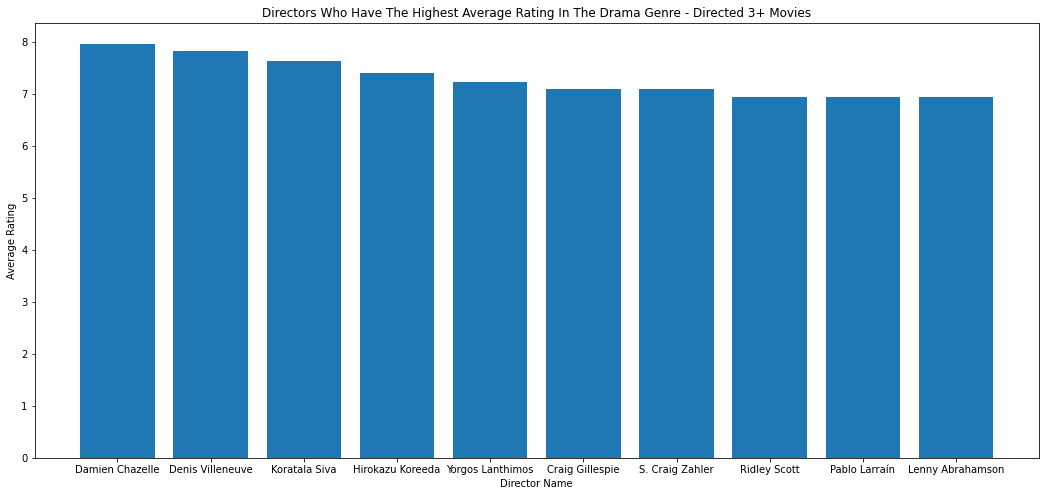

In [7]:
#Just directors that have produced the most in that genre
""""
top_directors = alive_imdb_directors.groupby('primary_name')['tconst'].count().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (18,12))
ax.bar(x = top_directors.index, height = top_directors.values)
ax.set_title('Directors Who Haved Directed The Most In X Genre')
ax.set_ylabel('Count')
ax.set_xlabel('Director Name');
"""

#**Directors with the best average rating for certain genre

top_directors = imdb_top_directors_drama.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (18,8))
ax.bar(x = top_directors.index, height = top_directors.values)
ax.set_title('Directors Who Have The Highest Average Rating In The Drama Genre - Directed 3+ Movies')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Director Name');


# *** For Drama Genre, Recommended Writer

In [14]:
split_writers = drama_imdb.assign(writers=drama_imdb.writers.str.split(",")).explode('writers')
to_be_or_not2 = split_writers.merge(imdb_name_basics, left_on = 'writers', right_on = 'nconst')

alive_imdb_writers = to_be_or_not2[to_be_or_not2['death_year'].isna()]

top_writers = alive_imdb_writers.groupby('primary_name')['tconst'].count().sort_values(ascending = False)
top_writers_names = top_writers[top_writers.values > 2]
writer_names_list = list(top_writers_names.index.values)
imdb_top_writers_drama = alive_imdb_writers[alive_imdb_writers['primary_name'].isin(writer_names_list)]

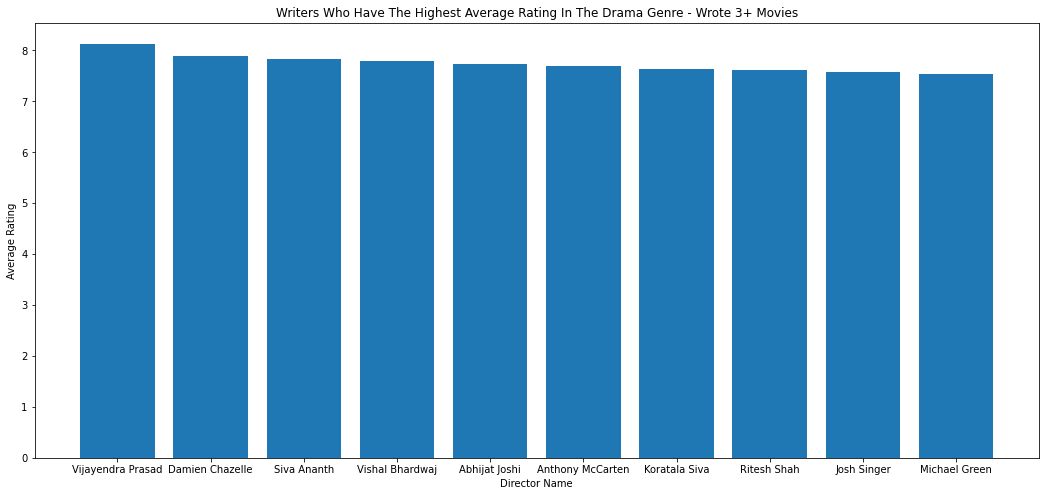

In [15]:
#Just writers that have written the most in that genre
"""
top_writers = alive_imdb_writers.groupby('primary_name')['tconst'].count().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (18,12))
ax.bar(x = top_writers.index, height = top_writers.values)
ax.set_title('Writers Who Haved writtern The Most In X Genre')
ax.set_ylabel('Count')
ax.set_xlabel('Writer Name')
"""

#Writers with the best average rating for certain genre

top_writers = imdb_top_writers_drama.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (18,8))
ax.bar(x = top_writers.index, height = top_writers.values)
ax.set_title('Writers Who Have The Highest Average Rating In The Drama Genre - Wrote 3+ Movies')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Director Name');


# *** For Action Genre, Top Directors

In [34]:
#Splits up any entry with multiple directors to single rows and merges with name_basics
split_directors = action_imdb.assign(directors=action_imdb.directors.str.split(",")).explode('directors')
to_be_or_not = split_directors.merge(imdb_name_basics, left_on = 'directors', right_on = 'nconst')
to_be_or_not.head()

#Gets rid of any dead directors
alive_imdb_directors = to_be_or_not[to_be_or_not['death_year'].isna()]

# Sort only directors who've directed three or more drama films in the last five years
top_directors = alive_imdb_directors.groupby('primary_name')['tconst'].count().sort_values(ascending = False)
top_directors_names = top_directors[top_directors.values > 2]
names_list = list(top_directors_names.index.values)
imdb_top_directors_action = alive_imdb_directors[alive_imdb_directors['primary_name'].isin(names_list)]

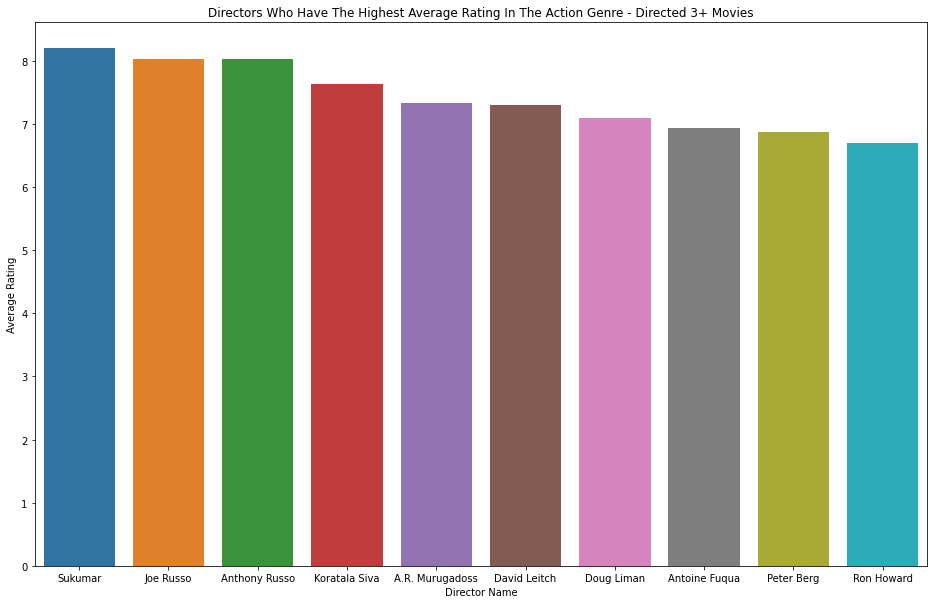

In [40]:
top_directors = imdb_top_directors_action.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x = top_directors.index, y = top_directors.values)
#ax.bar(x = top_directors.index, height = top_directors.values)
ax.set_title('Directors Who Have The Highest Average Rating In The Action Genre - Directed 3+ Movies')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Director Name');
#plt.savefig('ActionDirect.png')

# For Action Genre, Top Writers

In [41]:
split_writers = action_imdb.assign(writers=action_imdb.writers.str.split(",")).explode('writers')
to_be_or_not2 = split_writers.merge(imdb_name_basics, left_on = 'writers', right_on = 'nconst')

alive_imdb_writers = to_be_or_not2[to_be_or_not2['death_year'].isna()]

top_writers = alive_imdb_writers.groupby('primary_name')['tconst'].count().sort_values(ascending = False)
top_writers_names = top_writers[top_writers.values > 2]
names_list = list(top_writers_names.index.values)
imdb_top_writers_action = alive_imdb_writers[alive_imdb_writers['primary_name'].isin(names_list)]

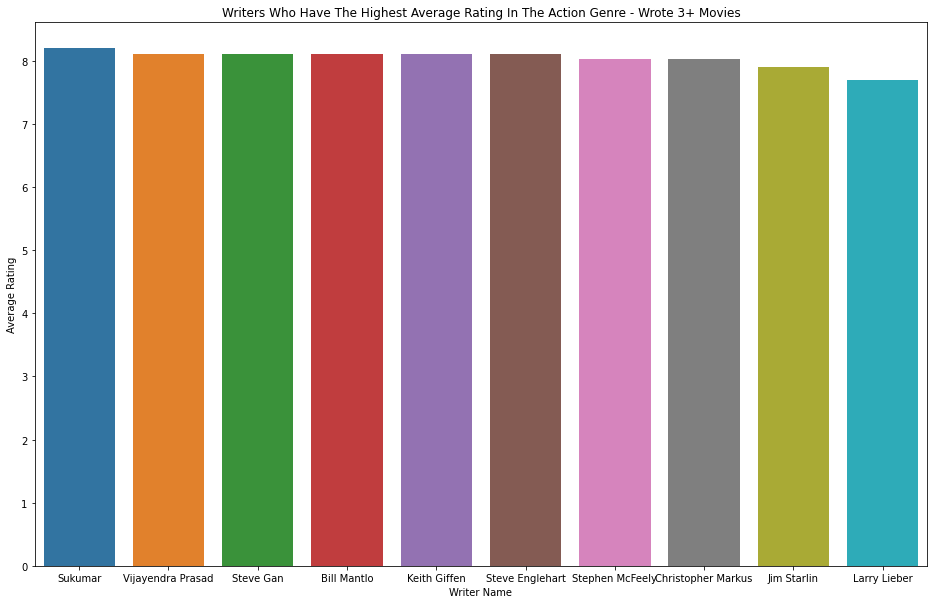

In [46]:
top_writers = imdb_top_writers_action.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x = top_writers.index, y = top_writers.values)
#ax.bar(x = top_writers.index, height = top_writers.values)
ax.set_title('Writers Who Have The Highest Average Rating In The Action Genre - Wrote 3+ Movies')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Writer Name');
#plt.savefig('ActionWriters.png')


In [20]:
concat = pd.concat([imdb_top_writers_action, imdb_top_writers_drama])
concat
sns.barplot(data = df_melted, x = 'primary_name', y = 'Money', hue = 'Gross_Budget')

,tconst,primary_title,start_year,genres,runtime_minutes,directors,writers,averagerating,numvotes,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
11,tt0369610,Jurassic World,2015,Action,124.0,nm1119880,nm0415425,7.0,539338,nm0415425,Rick Jaffa,1956.0,NaN,"writer,producer,actor","tt1318514,tt2103281,tt3450958,tt0369610"
12,tt1390411,In the Heart of the Sea,2015,Action,122.0,nm0000165,nm0415425,6.9,108628,nm0415425,Rick Jaffa,1956.0,NaN,"writer,producer,actor","tt1318514,tt2103281,tt3450958,tt0369610"
13,tt2103281,Dawn of the Planet of the Apes,2014,Action,130.0,nm0716257,nm0415425,7.6,390199,nm0415425,Rick Jaffa,1956.0,NaN,"writer,producer,actor","tt1318514,tt2103281,tt3450958,tt0369610"
14,tt3450958,War for the Planet of the Apes,2017,Action,140.0,nm0716257,nm0415425,7.5,201943,nm0415425,Rick Jaffa,1956.0,NaN,"writer,producer,actor","tt1318514,tt2103281,tt3450958,tt0369610"
15,tt0369610,Jurassic World,2015,Action,124.0,nm1119880,nm0798646,7.0,539338,nm0798646,Amanda Silver,1963.0,NaN,"writer,producer,actress","tt2103281,tt1318514,tt0369610,tt3450958"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,tt7063210,The Place,2017,Drama,105.0,nm0002645,nm0002645,7.1,6305,nm0002645,Paolo Genovese,1966.0,NaN,"writer,director","tt7063210,tt4901306,tt1630637,tt0203584"
2398,tt7489816,Nothing to Hide,2018,Drama,90.0,nm0146991,nm0002645,6.9,7585,nm0002645,Paolo Genovese,1966.0,NaN,"writer,director","tt7063210,tt4901306,tt1630637,tt0203584"
2475,tt5057140,Hold the Dark,2018,Drama,125.0,nm1099918,nm0086301,5.6,26796,nm0086301,Macon Blair,NaN,NaN,"actor,writer,producer","tt4062536,tt2359024,tt1800302,tt0878695"
2476,tt5710514,I Don't Feel at Home in This World Anymore.,2017,Drama,93.0,nm0086301,nm0086301,6.9,38259,nm0086301,Macon Blair,NaN,NaN,"actor,writer,producer","tt4062536,tt2359024,tt1800302,tt0878695"


# Director w/ Gross (Steal For Writers As Well)

In [35]:
#Makes dataset with just gross income
bom_movie_gross = pd.read_csv('Data/bom.movie_gross.csv.gz', compression='gzip')
bom_movie_gross['foreign_gross_clean'] = bom_movie_gross['foreign_gross'].str.replace(",","").astype(float)
bom_movie_gross['total_gross'] = bom_movie_gross['foreign_gross_clean'] + bom_movie_gross['domestic_gross']
bom_movie_gross_slim = bom_movie_gross[['title', 'year', 'total_gross']]

#Merges and properly matches based on title and year
imdb_with_gross = imdb.merge(bom_movie_gross_slim, how = 'inner', left_on = 'primary_title', right_on = 'title')
imdb_with_gross = imdb_with_gross[imdb_with_gross['start_year'] == imdb_with_gross['year']]

In [70]:
#Does above splitting of columns and sorts out dead people
gross_split_directors = imdb_with_gross.assign(directors=imdb_with_gross.directors.str.split(",")).explode('directors')
gross_to_be_or_not = gross_split_directors.merge(imdb_name_basics_slim, left_on = 'directors', right_on = 'nconst')

gross_alive_imdb_directors = gross_to_be_or_not[gross_to_be_or_not['death_year'].isna()]


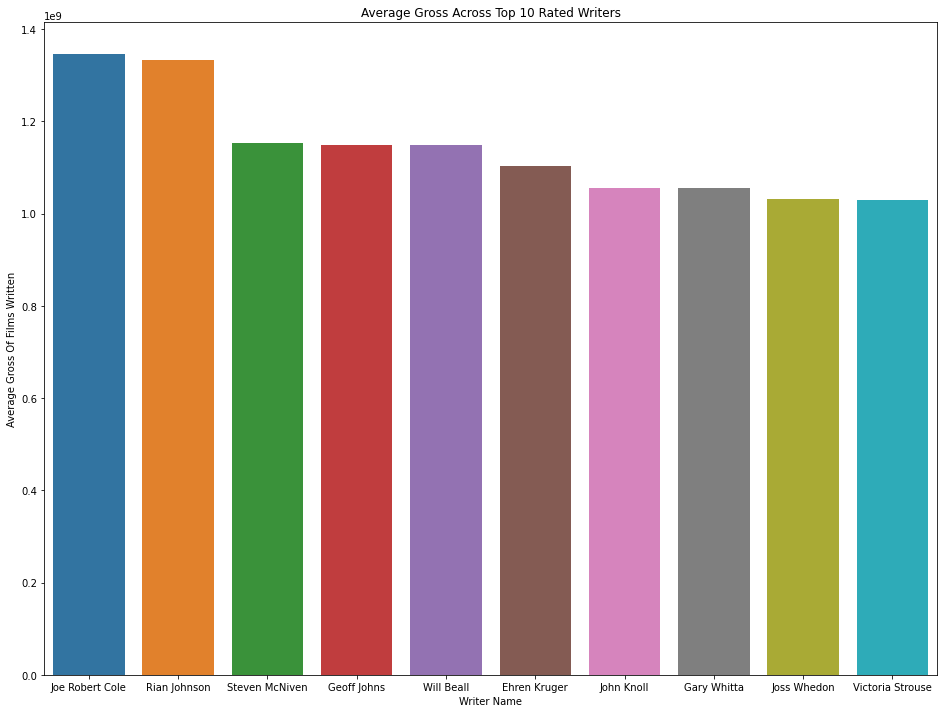

In [73]:
gross_directors = gross_alive_imdb_directors.groupby('primary_name')['total_gross'].mean().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (16,12))
sns.barplot(x = gross_directors.index, y = gross_directors.values)
#ax.bar(x = gross_directors.index, height = gross_directors.values)
ax.set_title('Average Gross Across Top 10 Rated Directors')
ax.set_ylabel('Average Gross Of Films Directed')
ax.set_xlabel('Writer Name')
#plt.savefig('GrossTop10Writer.png')

# Average Gross vs. Average Budget

In [47]:
#Makes datasubset with info need
tn_movie_budgets['year_tn'] = tn_movie_budgets['release_date'].str[-4:].astype(int)
tn_movie_budgets['production_budget_clean'] = tn_movie_budgets['production_budget'].str.replace(",","").str.replace("$","").astype(float)
tn_movie_budgets['worldwide_gross_clean'] = tn_movie_budgets['worldwide_gross'].str.replace(",","").str.replace("$","").astype(float)
tn_movie_budgets_slim = tn_movie_budgets[['movie', 'year_tn', 'production_budget_clean', 'worldwide_gross_clean']]

#Merges and matches
imdb_with_budget = imdb.merge(tn_movie_budgets_slim, how = 'inner', left_on = 'primary_title', right_on = 'movie')
imdb_with_budget = imdb_with_budget[imdb_with_budget['start_year'] == imdb_with_budget['year_tn']]


In [48]:
#Splits and sorts out dead
budget_split_directors = imdb_with_budget.assign(directors=imdb_with_budget.directors.str.split(",")).explode('directors')
budget_to_be_or_not = budget_split_directors.merge(imdb_name_basics_slim, left_on = 'directors', right_on = 'nconst')

budget_alive_imdb_directors = budget_to_be_or_not[budget_to_be_or_not['death_year'].isna()]


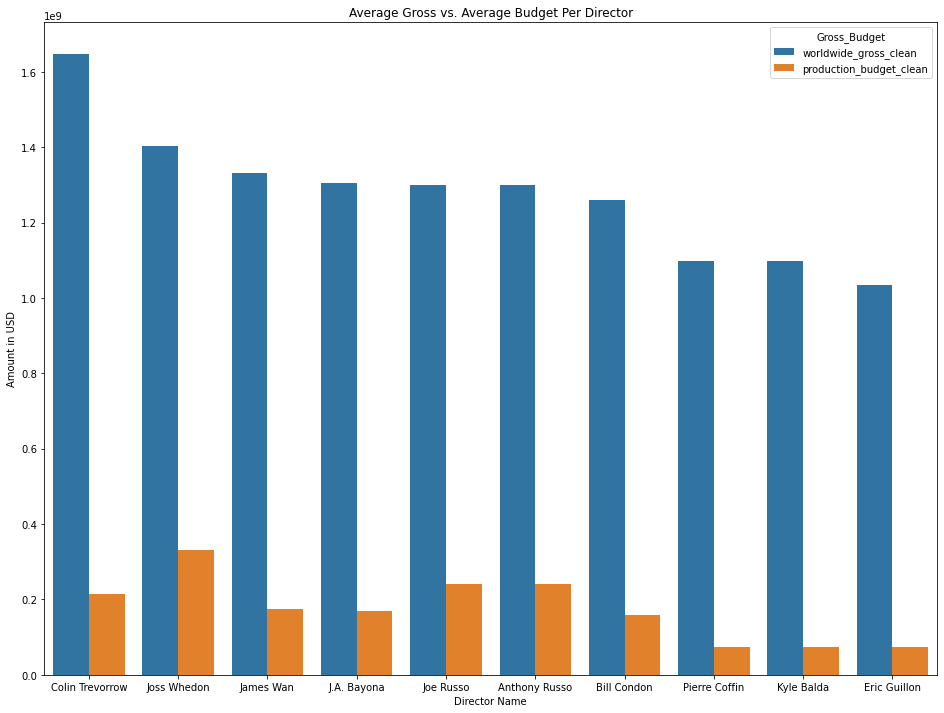

In [52]:
budget_directors = budget_alive_imdb_directors.groupby('primary_name')[['worldwide_gross_clean', 'production_budget_clean']].mean().sort_values(ascending = False, by = 'worldwide_gross_clean')[:10]
bd = budget_directors.reset_index()
df_melted = bd.melt("primary_name",var_name="Gross_Budget",value_name="Money")


fig, ax = plt.subplots(figsize = (16,12))
sns.barplot(data = df_melted, x = 'primary_name', y = 'Money', hue = 'Gross_Budget')
#ax.bar(x = gross_directors.index, height = gross_directors.values)
ax.set_title('Average Gross vs. Average Budget Per Director')
ax.set_ylabel('Amount in USD')
ax.set_xlabel('Director Name')
#budget_directors.head()
#plt.savefig('GrossVsBudget.png')


# Genre vs. Gross

genres
Sci-Fi         4.341513e+08
Adventure      3.833569e+08
Animation      3.799173e+08
Fantasy        3.248262e+08
Action         2.994018e+08
Musical        2.861333e+08
Family         2.232937e+08
Comedy         1.793387e+08
Thriller       1.566908e+08
Music          1.266354e+08
Mystery        1.081206e+08
Horror         1.078064e+08
Drama          9.560689e+07
Biography      9.385571e+07
History        8.924442e+07
Western        8.720000e+07
Crime          8.308557e+07
Romance        7.908658e+07
Sport          7.800917e+07
Documentary    6.201888e+06
War            2.638500e+06
Name: total_gross, dtype: float64

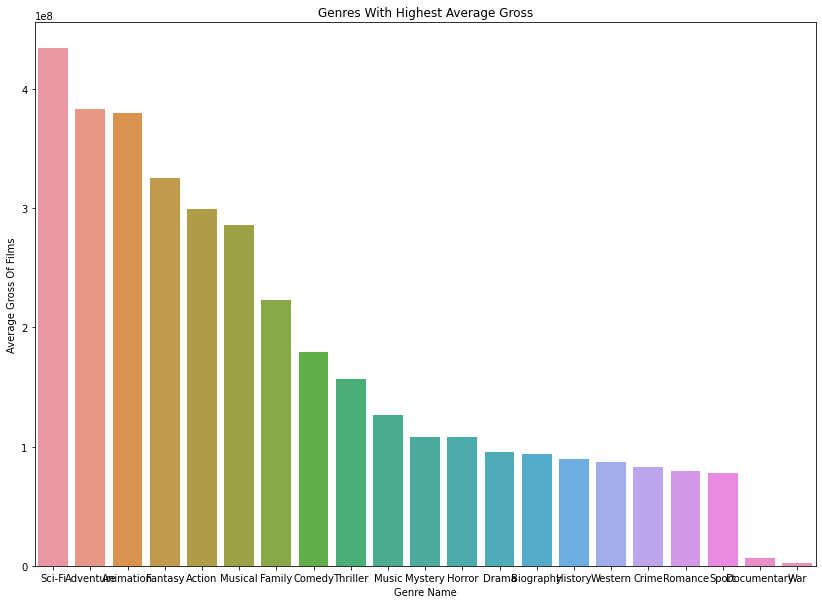

In [36]:
split_genres = imdb_with_gross.assign(genres=imdb_with_gross.genres.str.split(",")).explode('genres')

genre_gross = split_genres.groupby('genres')['total_gross'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (14,10))
sns.barplot(x = genre_gross.index, y = genre_gross.values)
ax.set_title('Genres With Highest Average Gross')
ax.set_ylabel('Average Gross Of Films')
ax.set_xlabel('Genre Name')
#plt.savefig('GenreAvgGross.png')
genre_gross

## Higher Rating Genre vs. Gross

In [57]:
imdb_with_gross2 = imdb_with_gross[imdb_with_gross['averagerating'] > imdb_with_gross['averagerating'].mean()]

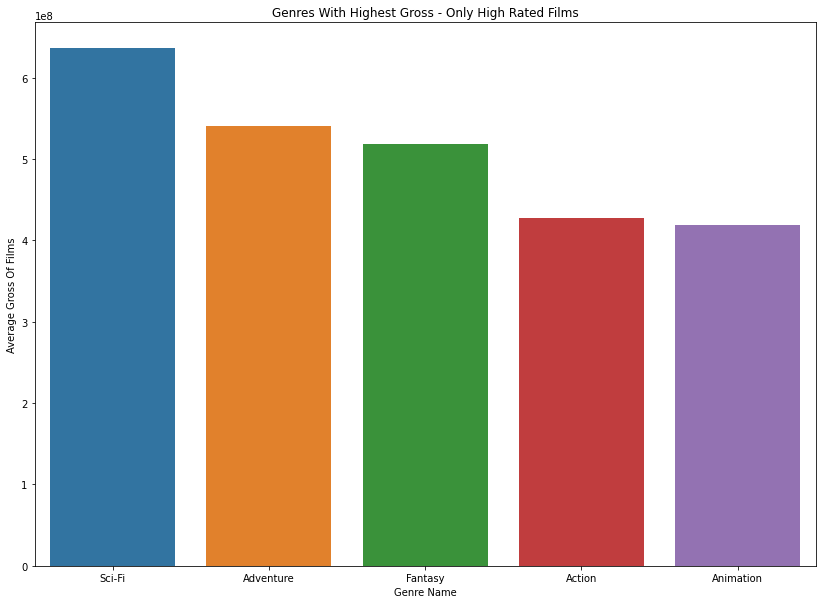

In [61]:
split_genres2 = imdb_with_gross2.assign(genres=imdb_with_gross2.genres.str.split(",")).explode('genres')

genre_gross2 = split_genres2.groupby('genres')['total_gross'].mean().sort_values(ascending = False)[:5]

fig, ax = plt.subplots(figsize = (14,10))
sns.barplot(x = genre_gross2.index, y = genre_gross2.values)
ax.set_title('Genres With Highest Gross - Only High Rated Films')
ax.set_ylabel('Average Gross Of Films')
ax.set_xlabel('Genre Name')
#plt.savefig('TopGenreGross.png')

In [29]:
scifi = genre_gross2.values[0]
adventure = genre_gross2.values[1]

In [33]:
percent_change = ((scifi - adventure)/adventure) * 100
percent_change

17.781185851642547

# Top Director Genre Regardless

In [13]:
split_directors = imdb.assign(directors=imdb.directors.str.split(",")).explode('directors')
to_be_or_not = split_directors.merge(imdb_name_basics, left_on = 'directors', right_on = 'nconst')

alive_imdb_directors = to_be_or_not[to_be_or_not['death_year'].isna()]

top_directors = alive_imdb_directors.groupby('primary_name')['tconst'].count().sort_values(ascending = False)
top_director_names = top_directors[top_directors.values > 3]
director_names_list = list(top_director_names.index.values)
imdb_top_directors = alive_imdb_directors[alive_imdb_directors['primary_name'].isin(director_names_list)]

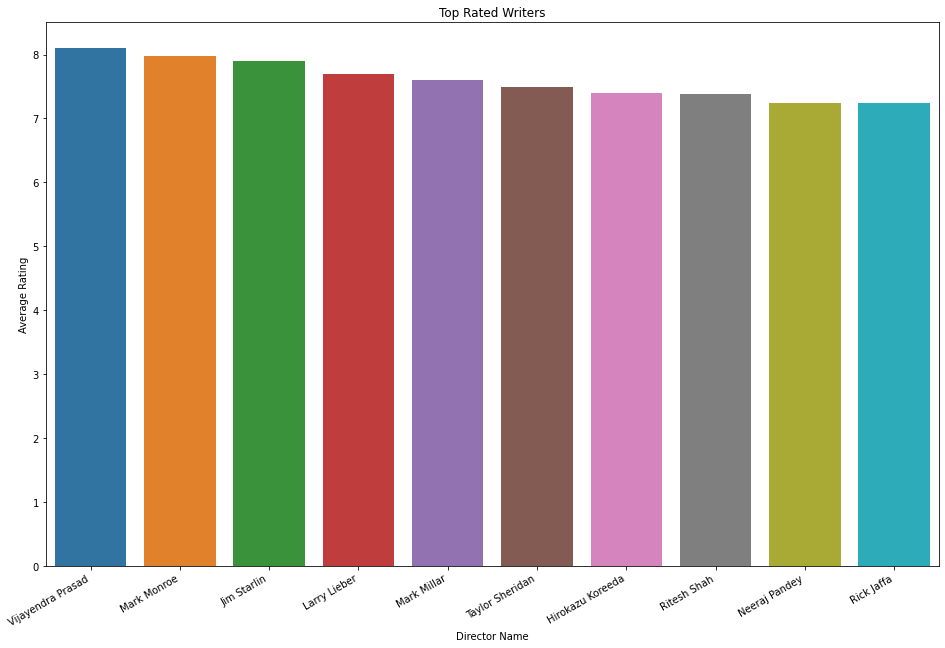

In [69]:
top_directors = imdb_top_directors.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)[:10]

fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x = top_directors.index, y = top_directors.values)
ax.set_title('Top Rated Writers')
ax.set_xticklabels(labels=top_directors.index, rotation = 30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Director Name');

#plt.savefig('TopWritersOverall.png')

# Combined Genres Graphs

In [ ]:
"""
directors_drama = sns.barplot(x='Directors', y='Average Rating', data=df_director_drama)
directors_drama.set_title('Directors Who Have the Highest Average Rating in the Drama Genre - Directed 3+ Movies')
#rotates x-tick labels
directors_drama.set_xticklabels(labels=director_drama_data['Directors'], rotation = 30)
#Pushes labels to left to match with correct bar after rotating
plt.setp(directors_drama.xaxis.get_majorticklabels(), ha='right')
#Adds total labels to bars
for p in directors_drama.patches:
    directors_drama.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
"""

In [30]:
#Splits up any entry with multiple directors to single rows and merges with name_basics
split_directors = action_imdb.assign(writers=action_imdb.writers.str.split(",")).explode('writers')
to_be_or_not = split_directors.merge(imdb_name_basics, left_on = 'writers', right_on = 'nconst')
to_be_or_not.head()

#Gets rid of any dead directors
alive_imdb_directors = to_be_or_not[to_be_or_not['death_year'].isna()]

# Sort only directors who've directed three or more drama films in the last five years
top_directors = alive_imdb_directors.groupby('primary_name')['tconst'].count().sort_values(ascending = False)
top_directors_names = top_directors[top_directors.values > 2]
names_list = list(top_directors_names.index.values)
imdb_top_directors_drama = alive_imdb_directors[alive_imdb_directors['primary_name'].isin(names_list)]

291

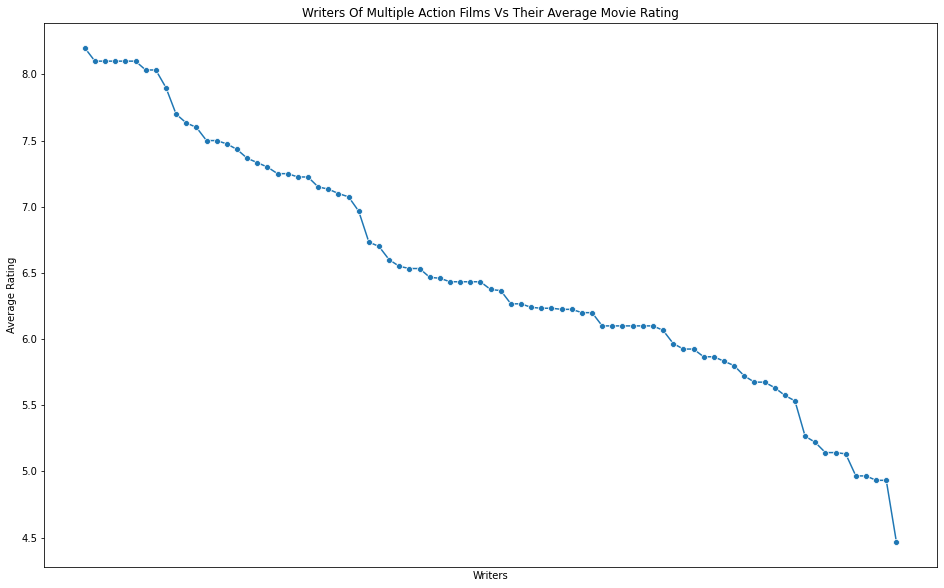

In [32]:
top_directors = imdb_top_directors_drama.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (16,10))
sns.lineplot(x = top_directors.index, y = top_directors.values, marker = 'o')
ax.set_title('Writers Of Multiple Action Films Vs Their Average Movie Rating')
ax.set_ylabel('Average Rating')
ax.axes.get_xaxis().set_ticks([])
ax.set_xlabel('Writers');
#plt.savefig('AllActionWriters291.png')

len(imdb_top_directors_drama)

# Extra Exploration

In [5]:
imdb.isna().sum()

tconst              0
primary_title       0
start_year          0
genres              0
runtime_minutes     0
directors           1
writers            51
averagerating       0
numvotes            0
dtype: int64

In [17]:
genre_split = imdb.assign(genres=imdb.genres.str.split(",")).explode('genres')
#percent_drama = genre_split.groupby('genres')['tconst'].count()

#alive_imdb_directors
drama_count= drama_imdb.groupby('directors')['genres'].count()
drama_count


directors
nm0000095    4
nm0000108    2
nm0000110    3
nm0000123    2
nm0000128    1
            ..
nm9572719    1
nm9749424    1
nm9751348    1
nm9985593    1
nm9988436    1
Name: genres, Length: 2178, dtype: int64

,tconst,primary_title,start_year,genres,runtime_minutes,directors,writers,averagerating,numvotes
0,tt0069049,The Other Side of the Wind,2018,Drama,122.0,nm0000080,"nm0000080,nm0462648",6.9,4517
1,tt0315642,Wazir,2016,"Action,Crime,Drama",103.0,nm2349060,"nm7430071,nm1249226,nm0006765,nm0430785,nm2349...",7.1,15378
2,tt0360556,Fahrenheit 451,2018,"Drama,Sci-Fi,Thriller",100.0,nm1023919,"nm0001969,nm1023919,nm0618881",4.9,14469
3,tt0365545,Nappily Ever After,2018,"Comedy,Drama,Romance",98.0,nm2223783,"nm0111845,nm10021676,nm1946260",6.4,6287
4,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",114.0,nm0291082,"nm0088747,nm0291082",6.5,105116
...,...,...,...,...,...,...,...,...,...
2544,tt8709036,A Christmas Prince: The Royal Wedding,2018,"Drama,Romance",92.0,nm0776271,"nm1405911,nm6912381",5.2,5186
2545,tt8954732,The Princess Switch,2018,Romance,101.0,nm0737517,"nm0076820,nm2997602",6.0,13993
2546,tt9124428,Champion,2018,"Drama,Romance,Sport",130.0,nm3446789,"nm3446789,nm2085861",8.5,4098
2547,tt9231140,A Man Called Ahok,2018,Drama,102.0,nm4563405,"nm5369998,nm4563413,nm4563405,nm10236344",9.1,4162


In [41]:
drama_imdb_titles = [title for title in drama_imdb['tconst']]
imdb_with_drama = imdb[imdb['tconst'].isin(drama_imdb_titles)]
split_genres = imdb_with_drama.assign(genres=imdb_with_drama.genres.str.split(",")).explode('genres')
with_drama = split_genres.groupby('genres')['tconst'].count().sort_values(ascending = False)
with_drama

genres
Drama          1453
Comedy          342
Romance         246
Action          231
Crime           229
Biography       213
Thriller        212
Mystery         132
Horror          110
History         106
Adventure       104
Fantasy          72
Sci-Fi           65
Music            52
War              44
Sport            36
Family           25
Animation        15
Western          12
Musical           8
Documentary       6
News              1
Name: tconst, dtype: int64